# Import Libs

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema

# Import Data

In [29]:
df = pd.read_csv('data.csv', usecols=['Period', 'Sales_quantity'])

# Clean Data

In [30]:
print(f'Shape before cleaning: {df.shape}')
# Drop duplicates
df.drop_duplicates(inplace=True)
# Convert period to datetime
df['Period'] = pd.to_datetime(df['Period'], format='%d.%m.%Y')
# Drop Nan's
df.dropna(inplace=True)
# Ensure quantity datatypes
df['Sales_quantity'] = df['Sales_quantity'].astype(float)
# Sort by Period
df.sort_values(by='Period', ignore_index=True, inplace=True)

print(f'Shape after cleaning: {df.shape}')

Shape before cleaning: (96, 2)
Shape after cleaning: (64, 2)


# Function that marks local extremas on data plot

In [31]:
def plot_and_find_extremas(start_date, end_date, df):
    # Filter dataframe for the given date range
    mask = (df['Period'] >= start_date) & (df['Period'] <= end_date)
    df_filtered = df.loc[mask]

    # Plot the data
    plt.figure(figsize=(10, 6))
    plt.plot(df_filtered['Period'], df_filtered['Sales_quantity'], label='Sales Quantity')
    
    # Find local minima and maxima
    sales_quantity_values = df_filtered['Sales_quantity'].values
    local_minima_indices = argrelextrema(sales_quantity_values, comparator=lambda x, y: x < y, order=5)[0]
    local_maxima_indices = argrelextrema(sales_quantity_values, comparator=lambda x, y: x > y, order=5)[0]

    # Plot dots at local minima and maxima
    plt.scatter(df_filtered['Period'].iloc[local_minima_indices], df_filtered['Sales_quantity'].iloc[local_minima_indices], c='r', label='Local Minima')
    plt.scatter(df_filtered['Period'].iloc[local_maxima_indices], df_filtered['Sales_quantity'].iloc[local_maxima_indices], c='g', label='Local Maxima')

    # Add vertical lines at start and end dates
    plt.axvline(pd.to_datetime(start_date, format='%d.%m.%Y'), color='y', linestyle='--', label='Start Date')
    plt.axvline(pd.to_datetime(end_date, format='%d.%m.%Y'), color='y', linestyle='--', label='End Date')

    plt.title('Sales Quantity Over Time with Local Minima and Maxima')
    plt.xlabel('Period')
    plt.ylabel('Sales Quantity')
    plt.legend()
    plt.show()

    # Print local minima and maxima
    print(f"Local Minima: {df_filtered['Period'].iloc[local_minima_indices].tolist()}")
    print(f"Local Maxima: {df_filtered['Period'].iloc[local_maxima_indices].tolist()}")

# Execution on dataset

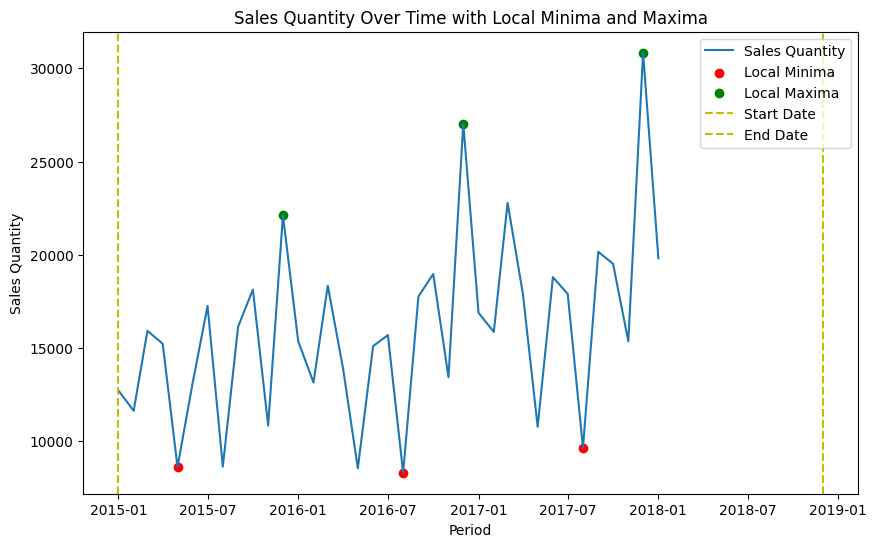

Local Minima: [Timestamp('2015-05-01 00:00:00'), Timestamp('2016-08-01 00:00:00'), Timestamp('2017-08-01 00:00:00')]
Local Maxima: [Timestamp('2015-12-01 00:00:00'), Timestamp('2016-12-01 00:00:00'), Timestamp('2017-12-01 00:00:00')]


In [36]:
# Example usage:
start_date = '01.01.2015'
end_date = '01.12.2018'
plot_and_find_extremas(start_date, end_date, df)

# Execution on subset

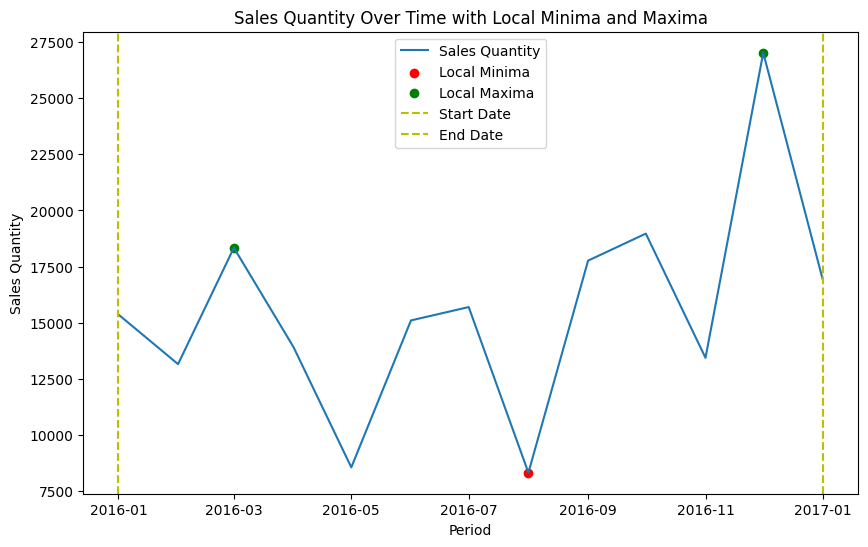

Local Minima: [Timestamp('2016-08-01 00:00:00')]
Local Maxima: [Timestamp('2016-03-01 00:00:00'), Timestamp('2016-12-01 00:00:00')]


In [37]:
# Example usage:
start_date = '01.01.2016'
end_date = '01.01.2017'
plot_and_find_extremas(start_date, end_date, df)